---
## Setup

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from src.gbfs_knapsack import solve_knapsack_gbfs
from src.bpso_knapsack import solve_knapsack_bpso
from src.dp_knapsack import solve_knapsack_dp
from src.test_case_loader import TestCaseLoader
from src.advanced_visualizer import AdvancedKnapsackVisualizer

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

print("✅ Setup complete")

✅ Setup complete


---
# PHẦN 1: ẢNH HƯỞNG CỦA KÍCH THƯỚC

## 1.1. Thí nghiệm

In [2]:
# Load size test cases
loader = TestCaseLoader()
size_cases = ['Size Small 30', 'Size Medium 50', 'Size Large 70']

results_size = []

print("🔬 Testing Size Impact...\n")

for tc_name in size_cases:
    print(f"Testing: {tc_name}")
    tc = loader.load_test_case(tc_name)
    
    # Run algorithms
    gbfs_result = solve_knapsack_gbfs(
        tc['items'], tc['weights'], tc['values'], tc['capacity'],
        max_states=5000
    )
    
    bpso_result = solve_knapsack_bpso(
        tc['items'], tc['weights'], tc['values'], tc['capacity'],
        n_particles=30, max_iterations=100
    )
    
    dp_result = solve_knapsack_dp(
        tc['items'], tc['weights'], tc['values'], tc['capacity']
    )
    
    results_size.append({
        'Size': len(tc['items']),
        'GBFS Value': gbfs_result['total_value'],
        'GBFS Time': gbfs_result['execution_time'],
        'BPSO Value': bpso_result['total_value'],
        'BPSO Time': bpso_result['execution_time'],
        'DP Value': dp_result['total_value'],
        'DP Time': dp_result['execution_time']
    })
    
    print(f"  ✓ GBFS: {gbfs_result['total_value']:.0f} ({gbfs_result['execution_time']:.3f}s)")
    print(f"  ✓ BPSO: {bpso_result['total_value']:.0f} ({bpso_result['execution_time']:.3f}s)")
    print(f"  ✓ DP: {dp_result['total_value']:.0f} ({dp_result['execution_time']:.3f}s)\n")

df_size = pd.DataFrame(results_size)
display(df_size)

FileNotFoundError: ⚠️  Summary file not found at data/test_cases/test_cases_summary.csv
Please run: python src/data_generator.py

## 1.2. Visualization

NameError: name 'df_size' is not defined

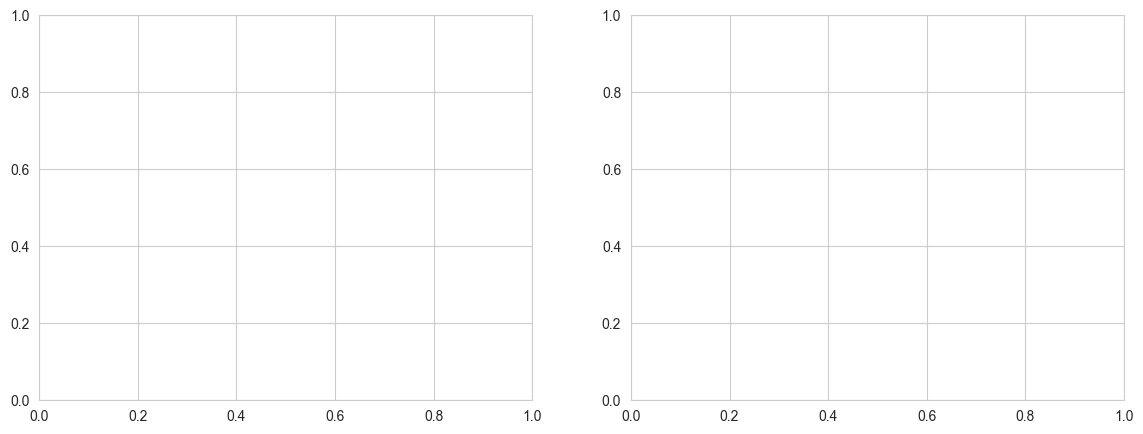

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Time scaling
ax = axes[0]
ax.plot(df_size['Size'], df_size['GBFS Time'], 'o-', label='GBFS', linewidth=2, markersize=10)
ax.plot(df_size['Size'], df_size['BPSO Time'], 's-', label='BPSO', linewidth=2, markersize=10)
ax.plot(df_size['Size'], df_size['DP Time'], '^-', label='DP', linewidth=2, markersize=10)
ax.set_xlabel('Number of Items')
ax.set_ylabel('Execution Time (s)')
ax.set_title('Scalability Analysis')
ax.set_yscale('log')
ax.legend()
ax.grid(True, alpha=0.3)

# Solution quality
ax = axes[1]
x = np.arange(len(df_size))
width = 0.25
ax.bar(x - width, df_size['GBFS Value'], width, label='GBFS', alpha=0.8)
ax.bar(x, df_size['BPSO Value'], width, label='BPSO', alpha=0.8)
ax.bar(x + width, df_size['DP Value'], width, label='DP', alpha=0.8)
ax.set_xlabel('Problem Size')
ax.set_ylabel('Solution Value')
ax.set_title('Solution Quality by Size')
ax.set_xticks(x)
ax.set_xticklabels([f'{s} items' for s in df_size['Size']])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../results/chapter3/3_1_3_size_impact.png', dpi=300, bbox_inches='tight')
plt.show()

---
# PHẦN 2: ẢNH HƯỞNG CỦA PHÂN BỐ

## 2.1. Phân bố theo vùng

In [4]:
# Test regional distribution
region_cases = ['Region 1Regions', 'Region 2Regions', 'Region 3Regions']
results_region = []

print("🔬 Testing Regional Distribution...\n")

for tc_name in region_cases:
    print(f"Testing: {tc_name}")
    tc = loader.load_test_case(tc_name)
    
    gbfs_result = solve_knapsack_gbfs(
        tc['items'], tc['weights'], tc['values'], tc['capacity'],
        max_states=5000
    )
    
    bpso_result = solve_knapsack_bpso(
        tc['items'], tc['weights'], tc['values'], tc['capacity'],
        n_particles=30, max_iterations=100
    )
    
    dp_result = solve_knapsack_dp(
        tc['items'], tc['weights'], tc['values'], tc['capacity']
    )
    
    results_region.append({
        'Regions': tc_name.split()[1][0],
        'GBFS Value': gbfs_result['total_value'],
        'GBFS Gap': ((dp_result['total_value'] - gbfs_result['total_value']) / dp_result['total_value']) * 100,
        'BPSO Value': bpso_result['total_value'],
        'BPSO Gap': ((dp_result['total_value'] - bpso_result['total_value']) / dp_result['total_value']) * 100,
        'DP Value': dp_result['total_value']
    })
    
    print(f"  ✓ Done\n")

df_region = pd.DataFrame(results_region)
display(df_region)

🔬 Testing Regional Distribution...

Testing: Region 1Regions


NameError: name 'loader' is not defined

## 2.2. Phân bố theo loại sản phẩm

In [5]:
# Test category distribution
category_cases = [
    'Category Clothing',
    'Category Electronics',
    'Category Food',
    'Category Furniture'
]
results_category = []

print("🔬 Testing Category Distribution...\n")

for tc_name in category_cases:
    print(f"Testing: {tc_name}")
    tc = loader.load_test_case(tc_name)
    
    gbfs_result = solve_knapsack_gbfs(
        tc['items'], tc['weights'], tc['values'], tc['capacity'],
        max_states=5000
    )
    
    bpso_result = solve_knapsack_bpso(
        tc['items'], tc['weights'], tc['values'], tc['capacity'],
        n_particles=30, max_iterations=100
    )
    
    dp_result = solve_knapsack_dp(
        tc['items'], tc['weights'], tc['values'], tc['capacity']
    )
    
    results_category.append({
        'Category': tc_name.split()[1],
        'GBFS Value': gbfs_result['total_value'],
        'GBFS Gap': ((dp_result['total_value'] - gbfs_result['total_value']) / dp_result['total_value']) * 100,
        'BPSO Value': bpso_result['total_value'],
        'BPSO Gap': ((dp_result['total_value'] - bpso_result['total_value']) / dp_result['total_value']) * 100,
        'DP Value': dp_result['total_value']
    })
    
    print(f"  ✓ Done\n")

df_category = pd.DataFrame(results_category)
display(df_category)

🔬 Testing Category Distribution...

Testing: Category Clothing


NameError: name 'loader' is not defined

---
# PHẦN 3: ĐẶC ĐIỂM TƯƠNG QUAN

## 3.1. Thí nghiệm

In [6]:
# Test data characteristics
char_cases = [
    'Data High Correlation',
    'Data Low Correlation',
    'Data High Value'
]
results_char = []

print("🔬 Testing Data Characteristics...\n")

for tc_name in char_cases:
    print(f"Testing: {tc_name}")
    tc = loader.load_test_case(tc_name)
    
    # Calculate correlation
    correlation = np.corrcoef(tc['weights'], tc['values'])[0, 1]
    
    gbfs_result = solve_knapsack_gbfs(
        tc['items'], tc['weights'], tc['values'], tc['capacity'],
        max_states=5000
    )
    
    bpso_result = solve_knapsack_bpso(
        tc['items'], tc['weights'], tc['values'], tc['capacity'],
        n_particles=30, max_iterations=100
    )
    
    dp_result = solve_knapsack_dp(
        tc['items'], tc['weights'], tc['values'], tc['capacity']
    )
    
    results_char.append({
        'Characteristic': tc_name.replace('Data ', ''),
        'Correlation': correlation,
        'GBFS Value': gbfs_result['total_value'],
        'GBFS Gap': ((dp_result['total_value'] - gbfs_result['total_value']) / dp_result['total_value']) * 100,
        'BPSO Value': bpso_result['total_value'],
        'BPSO Gap': ((dp_result['total_value'] - bpso_result['total_value']) / dp_result['total_value']) * 100,
        'DP Value': dp_result['total_value']
    })
    
    print(f"  ✓ Correlation: {correlation:.3f}\n")

df_char = pd.DataFrame(results_char)
display(df_char)

🔬 Testing Data Characteristics...

Testing: Data High Correlation


NameError: name 'loader' is not defined

---
# PHẦN 4: VISUALIZATION TỔNG HỢP

NameError: name 'df_size' is not defined

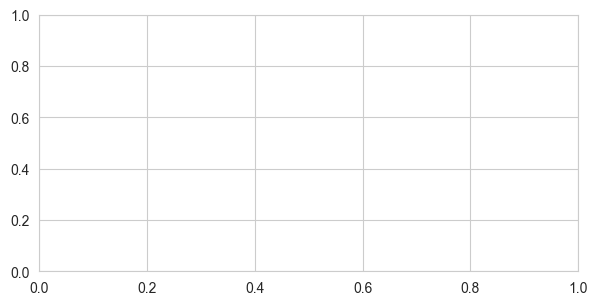

In [7]:
# Create comprehensive data characteristics visualization
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Size impact on time
ax = fig.add_subplot(gs[0, 0])
ax.plot(df_size['Size'], df_size['GBFS Time'], 'o-', label='GBFS', linewidth=2, markersize=10)
ax.plot(df_size['Size'], df_size['BPSO Time'], 's-', label='BPSO', linewidth=2, markersize=10)
ax.plot(df_size['Size'], df_size['DP Time'], '^-', label='DP', linewidth=2, markersize=10)
ax.set_xlabel('Number of Items')
ax.set_ylabel('Time (s)')
ax.set_title('Scalability: Time vs Problem Size')
ax.set_yscale('log')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. Regional gap
ax = fig.add_subplot(gs[0, 1])
x = np.arange(len(df_region))
width = 0.35
ax.bar(x - width/2, df_region['GBFS Gap'], width, label='GBFS', alpha=0.8)
ax.bar(x + width/2, df_region['BPSO Gap'], width, label='BPSO', alpha=0.8)
ax.set_xlabel('Number of Regions')
ax.set_ylabel('Gap to Optimal (%)')
ax.set_title('Regional Distribution Impact')
ax.set_xticks(x)
ax.set_xticklabels([f'{r} Region(s)' for r in df_region['Regions']])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 3. Category comparison
ax = fig.add_subplot(gs[1, 0])
x = np.arange(len(df_category))
width = 0.25
ax.bar(x - width, df_category['GBFS Value'], width, label='GBFS', alpha=0.8)
ax.bar(x, df_category['BPSO Value'], width, label='BPSO', alpha=0.8)
ax.bar(x + width, df_category['DP Value'], width, label='DP', alpha=0.8)
ax.set_xlabel('Product Category')
ax.set_ylabel('Solution Value')
ax.set_title('Performance by Category')
ax.set_xticks(x)
ax.set_xticklabels(df_category['Category'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 4. Correlation impact
ax = fig.add_subplot(gs[1, 1])
x = np.arange(len(df_char))
width = 0.35
ax.bar(x - width/2, df_char['GBFS Gap'], width, label='GBFS', alpha=0.8)
ax.bar(x + width/2, df_char['BPSO Gap'], width, label='BPSO', alpha=0.8)
ax.set_xlabel('Data Characteristic')
ax.set_ylabel('Gap to Optimal (%)')
ax.set_title('Correlation Impact on Performance')
ax.set_xticks(x)
ax.set_xticklabels(df_char['Characteristic'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Add second axis for correlation values
ax2 = ax.twinx()
ax2.plot(x, df_char['Correlation'], 'ro-', linewidth=2, markersize=8, label='Correlation')
ax2.set_ylabel('Weight-Value Correlation', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 5. Summary table
ax = fig.add_subplot(gs[2, :])
ax.axis('off')
summary_data = [
    ['Size', f"GBFS scales O(states), BPSO O(particles × iterations), DP O(n × capacity)"],
    ['Region', f"More regions → harder for greedy, BPSO more robust"],
    ['Category', f"Performance varies by category distribution"],
    ['Correlation', f"High correlation → easier for all algorithms"]
]
table = ax.table(cellText=summary_data,
                colLabels=['Factor', 'Observation'],
                cellLoc='left', loc='center',
                colColours=['lightblue', 'lightblue'])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 3)
ax.set_title('Key Insights', pad=20, fontsize=14, fontweight='bold')

plt.savefig('../results/chapter3/3_1_3_data_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

---
# KẾT LUẬN

## Tổng hợp kết quả:

### 1. Ảnh hưởng của kích thước:
- **GBFS**: Thời gian tăng ... khi n tăng
- **BPSO**: Thời gian tăng ... 
- **DP**: Thời gian tăng nhanh nhất (O(n × capacity))

### 2. Ảnh hưởng của phân bố:
- **Regional**: Nhiều vùng → ...
- **Category**: Các loại sản phẩm có đặc điểm riêng → ...

### 3. Ảnh hưởng của tương quan:
- **High correlation**: Dễ hơn cho tất cả thuật toán
- **Low correlation**: Khó hơn, gap tăng
- **High value**: ...

## Khuyến nghị:
- Với dữ liệu nhỏ, high correlation → Dùng DP
- Với dữ liệu lớn, phức tạp → Dùng BPSO
- Với dữ liệu có heuristic tốt → Dùng GBFS